In [2]:
import pandas as pd
import numpy as np

In [3]:
# Cargar el dataset desde un archivo CSV
file_path = "train.csv"  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

# Mostrar los primeros registros del dataset
print(df.head())

   Unnamed: 0   review_id          product_id          reviewer_id  stars  \
0           0  de_0203609  product_de_0865382  reviewer_de_0267719      1   
1           1  de_0559494  product_de_0678997  reviewer_de_0783625      1   
2           2  de_0238777  product_de_0372235  reviewer_de_0911426      1   
3           3  de_0477884  product_de_0719501  reviewer_de_0836478      1   
4           4  de_0270868  product_de_0022613  reviewer_de_0736276      1   

                                         review_body  \
0     Armband ist leider nach 1 Jahr kaputt gegangen   
1                 In der Lieferung war nur Ein Akku!   
2  Ein Stern, weil gar keine geht nicht. Es hande...   
3  Dachte, das wären einfach etwas festere Binden...   
4  Meine Kinder haben kaum damit gespielt und nac...   

                review_title language  product_category  
0  Leider nach 1 Jahr kaputt       de            sports  
1   EINS statt ZWEI Akkus!!!       de  home_improvement  
2            Achtung Abzoc

In [4]:
# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Comprobar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Comprobar duplicados
print("Número de registros duplicados:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Unnamed: 0        1200000 non-null  int64 
 1   review_id         1200000 non-null  object
 2   product_id        1200000 non-null  object
 3   reviewer_id       1200000 non-null  object
 4   stars             1200000 non-null  int64 
 5   review_body       1200000 non-null  object
 6   review_title      1199957 non-null  object
 7   language          1200000 non-null  object
 8   product_category  1200000 non-null  object
dtypes: int64(2), object(7)
memory usage: 82.4+ MB
None
         Unnamed: 0         stars
count  1.200000e+06  1.200000e+06
mean   5.999995e+05  3.000000e+00
std    3.464103e+05  1.414214e+00
min    0.000000e+00  1.000000e+00
25%    2.999998e+05  2.000000e+00
50%    5.999995e+05  3.000000e+00
75%    8.999992e+05  4.000000e+00
max    1.199999e+06  5.000000e+0

In [5]:
# Eliminar registros duplicados
df = df.drop_duplicates()

In [6]:
# Eliminar registros con valores nulos
df = df.dropna()

In [8]:
# Contar el número de registros por idioma
language_counts = df['language'].value_counts()

# Mostrar el conteo de idiomas
print("Número de registros por idioma:")
print(language_counts)

Número de registros por idioma:
language
de    200000
es    200000
ja    200000
fr    199996
zh    199994
en    199967
Name: count, dtype: int64


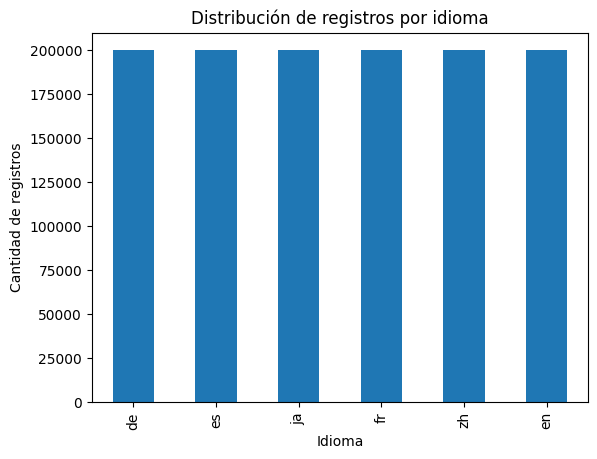

In [9]:
# Visualizar los idiomas en un gráfico de barras
import matplotlib.pyplot as plt

language_counts.plot(kind='bar')
plt.xlabel("Idioma")
plt.ylabel("Cantidad de registros")
plt.title("Distribución de registros por idioma")
plt.show()

In [10]:
# Filtrar por idioma español
df_es = df[df['language'] == 'es']

In [9]:
# Número de usuarios únicos
num_users = df['reviewer_id'].nunique()
print("Número de usuarios únicos:", num_users)

# Número de productos únicos
num_products = df['product_id'].nunique()
print("Número de productos únicos:", num_products)

# Número total de reseñas
print("Número total de reseñas:", len(df))

Número de usuarios únicos: 1098250
Número de productos únicos: 963013
Número total de reseñas: 1199957


Distribución de calificaciones:
stars
1    40000
2    40000
3    40000
4    40000
5    40000
Name: count, dtype: int64


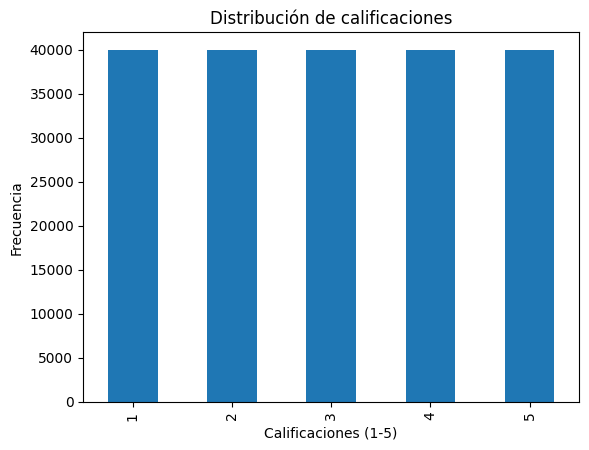

In [12]:
# Distribución de las calificaciones
stars_distribution = df_es['stars'].value_counts()
print("Distribución de calificaciones:")
print(stars_distribution)

stars_distribution.sort_index().plot(kind='bar')
plt.xlabel("Calificaciones (1-5)")
plt.ylabel("Frecuencia")
plt.title("Distribución de calificaciones")
plt.show()


In [10]:
# Seleccionar columnas relevantes
columns_needed = ['reviewer_id', 'product_id', 'stars', 'product_category']
df_cleaned = df[columns_needed]

df_cleaned.head()

,reviewer_id,product_id,stars,product_category
0,reviewer_de_0267719,product_de_0865382,1,sports
1,reviewer_de_0783625,product_de_0678997,1,home_improvement
2,reviewer_de_0911426,product_de_0372235,1,drugstore
3,reviewer_de_0836478,product_de_0719501,1,drugstore
4,reviewer_de_0736276,product_de_0022613,1,toy


In [11]:
# Producto con más reseñas
product_most_reviews = df_cleaned['product_id'].value_counts().idxmax()
product_reviews_count = df_cleaned['product_id'].value_counts().max()

print(f"El producto con más reseñas es '{product_most_reviews}' con {product_reviews_count} reseñas.")

# Usuario con más reseñas
user_most_reviews = df_cleaned['reviewer_id'].value_counts().idxmax()
user_reviews_count = df_cleaned['reviewer_id'].value_counts().max()

print(f"El usuario que hizo más reseñas es '{user_most_reviews}' con {user_reviews_count} reseñas.")


El producto con más reseñas es 'product_zh_0266705' con 12 reseñas.
El usuario que hizo más reseñas es 'reviewer_zh_0071620' con 16 reseñas.


In [12]:
# Guardar el dataset limpio
cleaned_file_path = "amazon_reviews_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Dataset limpio guardado en: {cleaned_file_path}")

Dataset limpio guardado en: amazon_reviews_cleaned.csv


In [17]:
import ploty as plt
# Contar reseñas por categoría
top_categories = df_cleaned['product_category'].value_counts().head(10)

print("Categorías principales:")
print(top_categories)

# Gráfica
top_categories.plot(kind='bar')
plt.title("Categorías con Más Reseñas")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Reseñas")
plt.show()


ModuleNotFoundError: No module named 'ploty'

In [18]:
# Contar reseñas por producto
top_products = df_cleaned['product_id'].value_counts().head(10)

print("Productos principales:")
print(top_products)


Productos principales:
product_id
product_es_0261843    8
product_es_0087077    7
product_es_0523350    7
product_es_0801630    7
product_es_0874126    7
product_es_0544842    7
product_es_0568956    7
product_es_0393632    7
product_es_0616440    7
product_es_0808483    7
Name: count, dtype: int64
